<a href="https://colab.research.google.com/github/boyoung21/ESAA/blob/main/YB0328(2)_AppleStock_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [27]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [28]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 3. Assign it to a variable apple

In [29]:
apple = data

### Step 4.  Check out the type of the columns

In [30]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [31]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple['Date'].head()

,Date
0,2014-07-08
1,2014-07-07
2,2014-07-03
3,2014-07-02
4,2014-07-01


### Step 6.  Set the date as the index

In [32]:
apple.set_index('Date', inplace=True)

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [7]:
# apple.index.duplicated().sum() > 연습문제 풀이 때 썼던 코드

np.int64(0)

In [33]:
# NO! All are unique
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [34]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [35]:
apple_month = apple.resample('BM').mean()

apple_month.head()

<ipython-input-35-8cf4730de396>:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_month = apple.resample('BM').mean()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
# 연습 문제 풀이 때 썼던 코드 (apple.index[-1] - apple.index[0]).days

12261

In [36]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [11]:
# 연습 문제 풀이 때 썼던 코드 apple.index.to_period('M').nunique()

404

In [37]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

<ipython-input-37-609da41a33cf>:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  apple_months = apple.resample('BM').mean()


404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

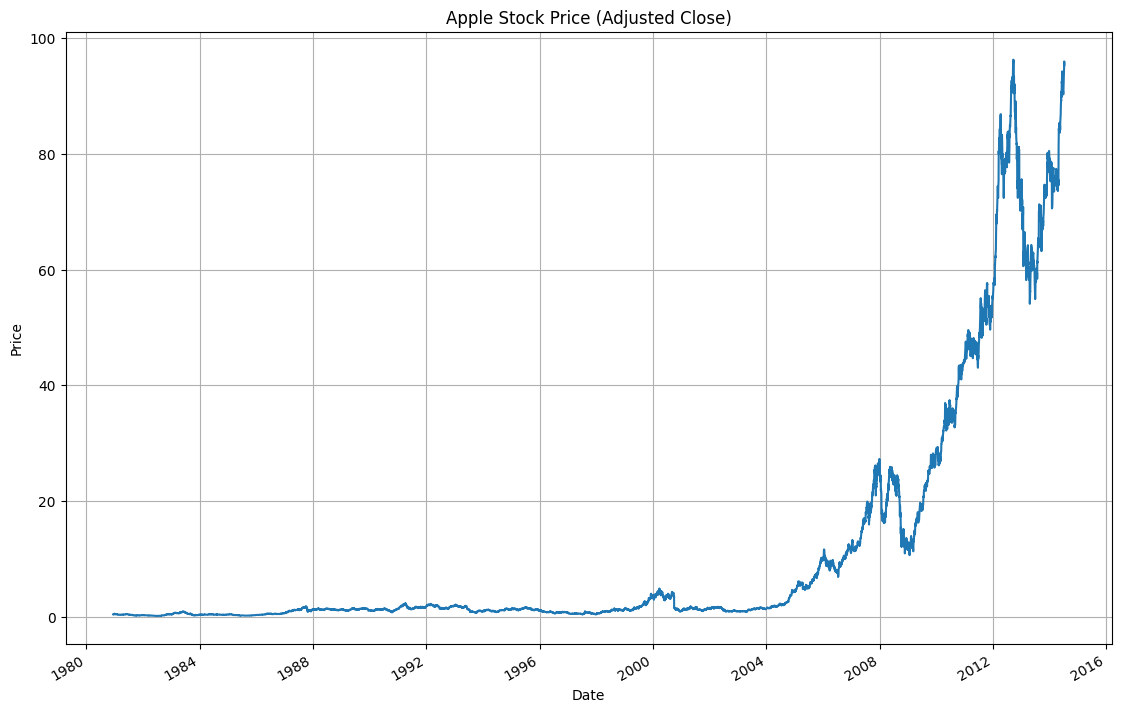

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title("Apple Stock Price (Adjusted Close)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()